In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import missingno as mnso

In [65]:
videodata=pd.read_csv(r"C:\Users\Manasi\Desktop\games\MainFile_W_PR_DEG.csv",encoding='iso-8859-1')

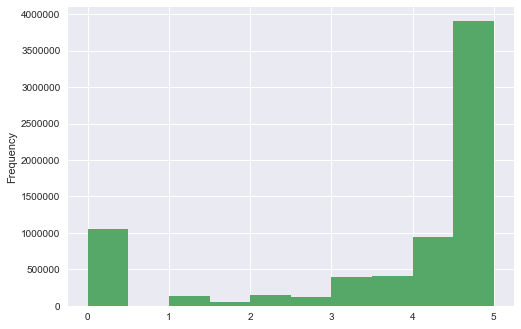

In [5]:
videodata.rating.plot(kind='hist')
plt.show()

In [66]:
videodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7167945 entries, 0 to 7167944
Data columns (total 11 columns):
videoID          object
userID           object
videoAge         float64
category         object
length           float64
views            float64
rating           float64
numberRatings    float64
comments         float64
PageRank         float64
InDegree         int64
dtypes: float64(7), int64(1), object(3)
memory usage: 601.6+ MB


In [109]:
videodata.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,PageRank,InDegree
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,0.65462,45
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,0.91563,65
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,1.06318,94
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0,0.68903,40
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0,0.10000,21


In [67]:
def dummyvar(df):
    dumvar=df
    dumvar.select_dtypes(include=['object']).copy()
    dumvar=pd.get_dummies(dumvar, columns=["category"], prefix=["type"])
    return dumvar

In [17]:
df1=dummyvar(videodata)

In [68]:
df=df1.drop('videoID',axis=1)

In [69]:
data=df.drop('userID', axis=1)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7167945 entries, 0 to 7167944
Data columns (total 37 columns):
videoAge                          float64
length                            float64
views                             float64
rating                            float64
numberRatings                     float64
comments                          float64
PageRank                          float64
InDegree                          int64
type_ UNA                         uint8
type_Autos & Vehicles             uint8
type_Autos &amp; Vehicles         uint8
type_Comedy                       uint8
type_Education                    uint8
type_Entertainment                uint8
type_Film & Animation             uint8
type_Film &amp; Animation         uint8
type_Gadgets & Games              uint8
type_Gaming                       uint8
type_Howto & DIY                  uint8
type_Howto & Style                uint8
type_Howto &amp; Style            uint8
type_Music                       

In [71]:
data['class'] = np.where(data['rating']<4.2, '0', '1')

In [89]:
data['class']=data['class'].astype('int')

In [73]:
from sklearn import metrics
from sklearn import svm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.cross_validation  import cross_val_score

In [91]:
train_cols=data[['videoAge','views','numberRatings','comments','PageRank','InDegree','class']]

In [92]:
msk = np.random.rand(len(train_cols)) < 0.8
train = train_cols[msk]
test = train_cols[~msk]

In [93]:
test.shape

(1434870, 7)

In [94]:
X_Train=train.drop('class',axis=1)
Y_Train=train['class']

In [95]:
X_Test=train.drop('class',axis=1)
Y_Test=train['class']

In [96]:
model = LogisticRegression()
mod_fit = model.fit(X_Train,Y_Train)

In [97]:
print(model.score(X_Train,Y_Train))

0.621849007731


In [98]:
pred = mod_fit.predict(X_Test)

In [99]:
metrics.accuracy_score(Y_Test,pred)

0.62184900773145302

In [100]:
print (metrics.confusion_matrix(Y_Test,pred))


[[   5947 2163583]
 [   4385 3559160]]


In [101]:
preds = model.predict_proba(X_Test)[:,1]
fpr,tpr, _ = roc_curve(Y_Test,preds)

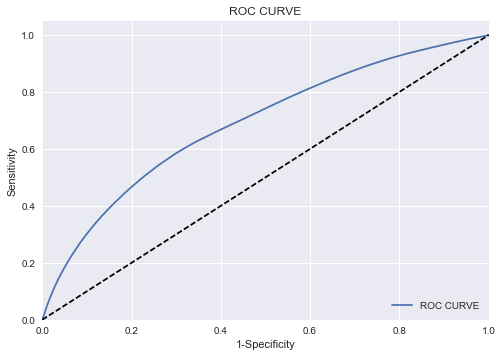

In [102]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [103]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.neighbors import NearestNeighbors
import datetime
from matplotlib.finance import date2num
from sklearn.cross_validation import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [106]:
RND_SEED=0
sm_enn = SMOTEENN(ratio=0.8,k=5,size_ngh=5,random_state=1)
X_train_resampled, y_train_resampled = sm_enn.fit_sample(X_Train, Y_Train)

videoAge         float64
views            float64
numberRatings    float64
comments         float64
PageRank         float64
InDegree           int64
dtype: object